# Step2 最尤推定
## 2.1 生成モデルの概要
### 2.1.1 生成モデルとは
- 生成モデルの目標は，あるデータ $x$ の確率分布 $p(x)$ をモデル化すること．
### 2.1.2 母集団とサンプル
- 母集団という膨大なサイズの対象から，数が限られたサンプルを使い，モデルを「推定」する．
- 確率分布の推定のために以下の２つの作業を行う．
    1. モデル化: 真の確率分布が「パラメータで調整可能な確率分布」(正規分布など)で近似されると仮定する．
    2. パラメータ推定: その確率分布がサンプルデータに合うようにパラメータを推定する．

## 2.2　実データを使った生成モデルの実装
1993年の香港の18歳の身長のデータ25000件のデータセットを使用する．

### 2.2.1 身長データセットの読み込み

[167.089607 181.648633 176.2728   ... 164.334317 171.524117 174.949129]


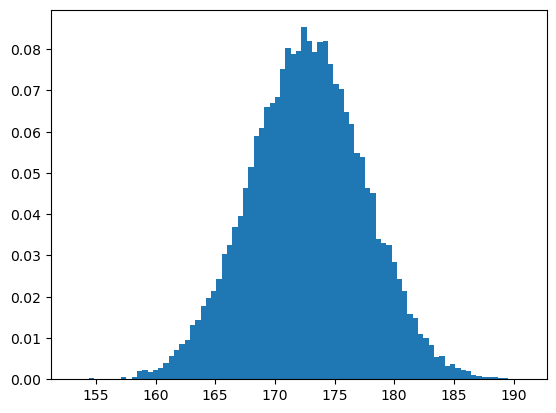

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = 'height.txt'
# python では __file__ を使って，現在のファイルの場所を取得することができるが，ipynb ではそれはできない．
xs = np.loadtxt('height.txt')
print(xs) # (25000, )

# ヒストグラム
plt.hist(xs, bins='auto', density=True)
plt.xlabel = ('Height(cm)')
plt.ylabel = ('Probability Density') # 確率密度
plt.show()

- グラフは正規分布のような形をしている．
- 身長の確率分布を正規分布としてモデル化することにする．

### 2.2.2 正規分布による生成モデル
以下の２つの作業で，正規分布の生成モデルを実装する．
1. モデル化: 真の確率分布が正規分布で近似されると仮定する．
2. パラメータ推定: サンプルをもとに，正規分布のパラメータを推定する．

パラメータの推定方法として「最尤推定」がある．

172.70250853667997
4.830167473396299


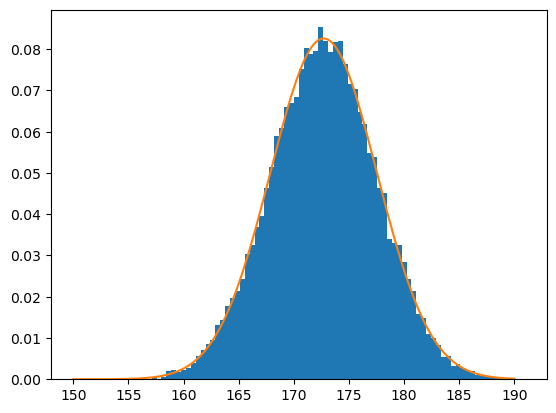

In [4]:
# xs は25000個の要素を持つ1次元配列
mu = np.mean(xs)
sigma = np.std(xs)

print(mu)
print(sigma)

# 正規分布の関数
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu) ** 2 / (2 * sigma**2))
    return y

x = np.linspace(150, 190, 1000)
y = normal(x, mu, sigma)

# グラフの描画
plt.hist(xs, bins='auto', density=True)
plt.plot(x, y)
plt.xlabel = ('Height(cm)')
plt.ylabel = ('Probability Density')
plt.show()

ヒストグラムと正規分布がよく一致していることがわかる．

## 2.3 最尤推定の理論(Maximum Likelihood Estimation)
- 最尤推定とは，あるサンプルが得られ，そのサンプルはパラメータ $\theta$ によって確率分布が決定するとした時，尤度を最大化する $\theta$ を見つけること．
- 実際には対数尤度の最大化を行う．
- 基本的には，微分を用いて尤度関数の最大値を見つける．

### 2.3.3 正規分布の最尤推定
- 正規分布の最尤推定を行うと，パラメータ $\mu$ は平均，$\delta$ は標準偏差にすれば良いことが解析的にわかる．(数式によって求まることを，解析的に解けるという．)

## 2.4 生成モデルの用途
### 2.4.1 新しいデータの生成
- 生成モデルを使えば，新しいデータを生成できる．
    - Numpyには．正規分布に従う乱数を生成する，`np.random.normal()` 関数がある．
    - 引数の `loc` は平均，`scale` は標準偏差に対応する．`size` は生成する個数で，指定しない場合は1つだけ生成される．

In [6]:
sample = np.random.normal(loc=mu, scale=sigma, size=None)
print(sample)

180.56637635170736


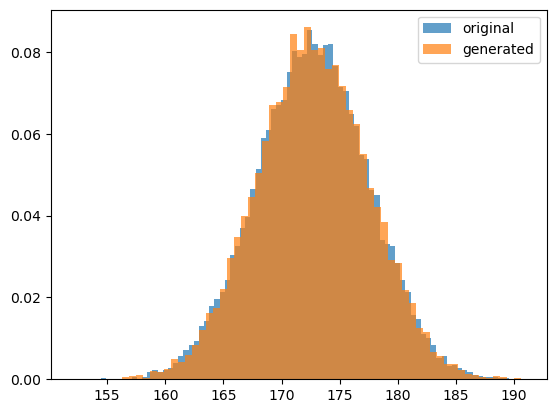

In [7]:
samples = np.random.normal(loc=mu, scale=sigma, size=10000)

plt.hist(xs, bins='auto', density=True, alpha=0.7, label='original')
plt.hist(samples, bins='auto', density=True, alpha=0.7, label='generated')
plt.xlabel = ('Height(cm)')
plt.ylabel = ('Probabirity Density')
plt.legend()
plt.show()

- 生成したデータと，実際のデータの分布は，大部分が一致する．
- これは，生成モデルが，観測データの特徴を捉えた新しいデータを生成できたということ．
- これを多次元にすることで，画像などのデータを生成できる．

### 2.4.2 確率の計算
- 確率分布がわかれば，ある値がどれほど起きやすいか(起きにくいか)がわかる．
- 連続型の確率分布で確率を求めるには，積分が必要．
- 積分ができない場合は，モンテカルロ法を使って近似的に求める．
- Scipy には正規分布の積分を解析的に求める関数が存在する．
    -　累積分布関数(Cumulative Distribution Function = CDF)を求めるものであり， `scipy.stats.norm.cdf(x, loc=0, scale=1)` で表される．`loc` は平均，`scale` は標準偏差

In [8]:
import scipy

x = 1.0
p = scipy.stats.norm.cdf(x, loc=0, scale=1)
print(p)

0.8413447460685429


- $p = 0.84...$ は $x <= 1$ の区間の標準正規分布の面積を表す．
- この面積は $x <= 1$ となる確率を表す．

In [9]:
from scipy.stats import norm

p1 = norm.cdf(160, loc=mu, scale=sigma)
print(f'p(x <= 160): {p1}')

p2 = norm.cdf(180, loc=mu, scale=sigma)
print(f'p(x > 180): {1-p2}')

p(x <= 160): 0.004271406830855
p(x > 180): 0.06541774339950823


- 身長が160cm以下である確率は0.4%程度，180cmより大きい確率は6%程度であることがわかる．
- このようにして算出した「確率」は様々な意思決定に利用できる．